# [Using a matrix to transform a point cloud](http://pointclouds.org/documentation/tutorials/matrix_transform.php#matrix-transform)

- [lidar_201.pcd](https://github.com/adioshun/gitBook_Tutorial_PCL/upload/master/Snippets/lidar_201.pcd)와 [lidar_202.pcd](https://github.com/adioshun/gitBook_Tutorial_PCL/upload/master/Snippets/lidar_202.pcd)를 사용하였습니다. 

- cpp 버젼은 [[여기]](./Using-a-matrix-to-transform-a-point-cloud.md)에서 확인 할 수 있습니다. 

In [70]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import pcl
import numpy as np
import random
import sys
sys.path.append("/workspace/include")
from visualization_helper import *
from filter import *
import k3d

%matplotlib inline

# 기준 Lidar(201)

<PointCloud of 27067 points>
a201.shape : (27067, 3)
(x) : 29.0m
(y) : 34.2m
(z) : 5.1m


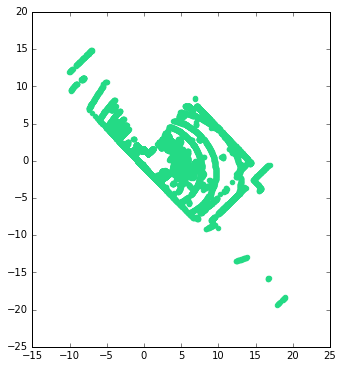

In [71]:
lidar_201 = pcl.PointCloud()
lidar_201.from_file('lidar_201.pcd')
print(lidar_201)
a201 = lidar_201.to_array()
print("a201.shape : {}".format(a201.shape))
visualization2d_arr_xyz(lidar_201.to_array())


# 변환 Lidar(202)

<PointCloud of 23949 points>
(x) : 19.2m
(y) : 18.5m
(z) : 5.3m


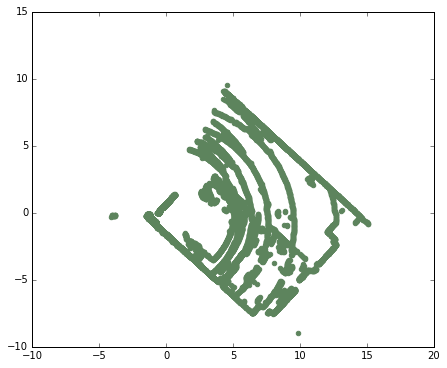

In [72]:
lidar_202 = pcl.PointCloud()
lidar_202.from_file('lidar_202.pcd')
print(lidar_202)
a202 = lidar_202.to_array()
visualization2d_arr_xyz(lidar_202.to_array())

Rotation Matrix
```
-0.986734, 0.070747, -0.146117, 13.072186
-0.051031, -0.989596, -0.134524, 0.532883
-0.154114, -0.125283, 0.980078, 1.061544
0.000000, 0.000000, 0.000000, 1.000000
```

# 변환

In [73]:
ones = np.ones((a202.shape[0],1))
a202 = np.column_stack([a202, ones])
print("a202.shape : {}".format(a202.shape))
print(a202)

a202.shape : (23949, 4)
[[-0.28904399 -0.40959415 -0.02627265  1.        ]
 [-0.2888352  -0.40914688  0.11562484  1.        ]
 [-0.28863174 -0.40870705  0.13406827  1.        ]
 ...
 [-0.30140984 -0.38523239  0.11292543  1.        ]
 [-0.30607671 -0.39091593  0.13303299  1.        ]
 [-0.31368551 -0.3994832   0.00886582  1.        ]]


In [74]:
key_array = np.array([[-0.986734, 0.070747, -0.146117, 13.072186],
                     [-0.051031, -0.989596, -0.134524, 0.532883],
                     [-0.154114, -0.125283, 0.980078, 1.061544],
                     [0.000000, 0.000000, 0.000000, 1.000000]])
print("key_array.shape : {}".format(key_array.shape))
print(key_array)

key_array.shape : (4, 4)
[[-0.986734  0.070747 -0.146117 13.072186]
 [-0.051031 -0.989596 -0.134524  0.532883]
 [-0.154114 -0.125283  0.980078  1.061544]
 [ 0.        0.        0.        1.      ]]


In [75]:
new_data =  np.ones((a202.shape[0],a202.shape[1]), dtype='f') #dtype='f'는 ROS메시지 변환시필요
print("new_data.shape : {}".format(new_data.shape))
print(new_data)

new_data.shape : (23949, 4)
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 ...
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [76]:
for I in range(0,a202.shape[0]-1):
    new_data[I,] = np.dot(key_array, a202[I,])

In [77]:
print("new_data.shape : {}".format(new_data.shape))
print(new_data)

new_data.shape : (23949, 4)
[[13.332257    0.95650023  1.1316557   1.        ]
 [13.311349    0.9369584   1.2706381   1.        ]
 [13.308484    0.9340316   1.2886276   1.        ]
 ...
 [13.325843    0.9142975   1.2669343   1.        ]
 [13.327107    0.91745514  1.2880726   1.        ]
 [ 1.          1.          1.          1.        ]]


In [78]:
new_data = np.delete(new_data, (3), axis=1)
new_data = np.delete(new_data, (new_data.shape[0]-1), axis=0)

In [79]:
print("new_data.shape : {}".format(new_data.shape))
print(new_data)

new_data.shape : (23948, 3)
[[13.332257    0.95650023  1.1316557 ]
 [13.311349    0.9369584   1.2706381 ]
 [13.308484    0.9340316   1.2886276 ]
 ...
 [13.320752    0.9109392   1.2835898 ]
 [13.325843    0.9142975   1.2669343 ]
 [13.327107    0.91745514  1.2880726 ]]


In [80]:
new_cloud = pcl.PointCloud()
new_cloud.from_array(new_data)

(x) : 18.9m
(y) : 18.7m
(z) : 6.3m


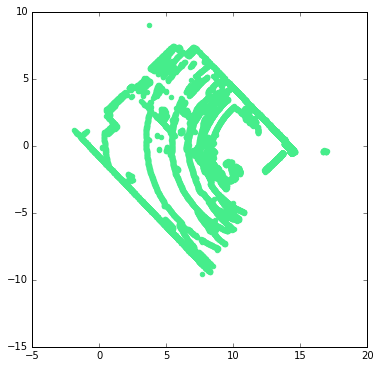

In [81]:
visualization2d_arr_xyz(new_data)